In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

In [0]:
# Load in the dataset
fashion_mnist = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist
print('X shape: \n Train: {} | Test: {}'.format(x_train.shape, x_test.shape))
print('Y shape: \n Train: {} | Test: {}'.format(y_train.shape, y_test.shape))

4423680/4422102 [==============================] - 0s 0us/step
X shape: 
 Train: (60000, 28, 28) | Test: (10000, 28, 28)
Y shape: 
 Train: (60000,) | Test: (10000,)


In [0]:
# We can see that X is 2D and Y is (N,) shaped
# The problem is the images, they're grayscale so they don't have a dimension for color channel
# We need to expand the dimension of X so we can pass it to CNN (CNN takes 3D inputs) | 
# Also I need to flatten Y since output will be 1D vector
# Since the values in X aren't centered in some value. Let's centerize it
x_train, x_test = x_train / 255.0, x_test / 255.0
# Expand the dimensions of X
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

# Flatten the Y
y_train, y_test = y_train.flatten(), y_test.flatten()

print('X shape: \n Train: {} | Test: {}'.format(x_train.shape, x_test.shape))
print('Y shape: \n Train: {} | Test: {}'.format(y_train.shape, y_test.shape))

X shape: 
 Train: (60000, 28, 28, 1) | Test: (10000, 28, 28, 1)
Y shape: 
 Train: (60000,) | Test: (10000,)


In [0]:
# number of classes
K = len(set(y_train))
print(K)

10


In [0]:
# We can see that the shapes of the data is right. So now we can proceed the next step, model creation!
# I'll be using functional api, so it may be more difficult to understand than creating the NN with Sequential model.

# input data is 28x28, 28x28 -2-> 14x14 -2-> 7x7 => We can't use more than 3 Convolutional layers with "strides=2" argument
i = Input(shape = x_train[0].shape) # The input shape will be same with any sample from x_train or x_test
# I'll use 64 -> 128 -> 256 numbers of filters for 3 convolutional layers
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(i) # data is 28x28
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x) # data is 14x14
x = Conv2D(256, (3,3), strides = 2, activation = 'relu')(x) # data is 7x7
# Now flatten them all because Dense layer works with flatten arrays (1D in general)
x = Flatten()(x)
# Drop 20% of the nodes
x = Dropout(.2)(x)
# We can add the Dense layer now
x = Dense(512, activation = 'relu')(x)
# MORE DROPOUT
x = Dropout(.2)(x)
# Now pass the final Dense layer
x = Dense(K, activation = 'softmax')(x) # we have more than 2 classes, so softmax would fit better the situation

# create the model
model = Model(i, x)

# compile it
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

# fitting the model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 7)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4940 - accuracy: 0.8170 - val_loss: 0.3801 - val_accuracy: 0.8580
Epoch 2/7
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3347 - accuracy: 0.8739 - val_loss: 0.3410 - val_accuracy: 0.8743
Epoch 3/7
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2817 - accuracy: 0.8934 - val_loss: 0.3073 - val_accuracy: 0.8893
Epoch 4/7
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2485 - accuracy: 0.9056 - val_loss: 0.3032 - val_accuracy: 0.8954
Epoch 5/7
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2158 - accuracy: 0.9170 - val_loss: 0.2989 - val_accuracy: 0.8946
Epoch 6/7
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1908 - accuracy: 0.9279 - val_loss: 0.3151 - val_accuracy: 0.8989
Epoch 7/7
60000/60000 [==============================] -

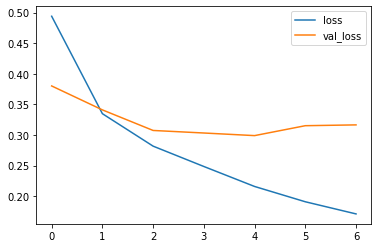

In [0]:
# plot the results
# loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

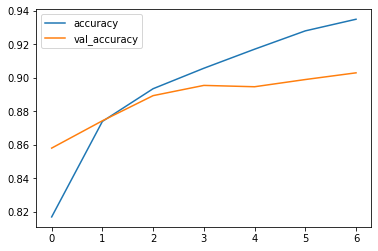

In [0]:
# accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [0]:
p_test = model.predict(x_test).argmax(axis = 1)

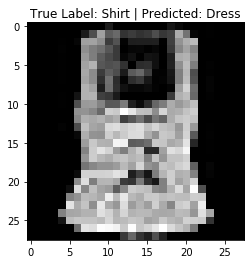

In [0]:
# examples of misclassification
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split()

misclassified_idx = np.where(p_test != y_test)[0]
e = np.random.choice(misclassified_idx)
plt.imshow(x_test[e].reshape(28,28), cmap = 'gray')
plt.title('True Label: {} | Predicted: {}'.format(labels[y_test[e]], labels[p_test[e]]))
plt.show()